# 向量
> 有值和方向的量

假设在二维平面有一个点 x = 2, y = 1

\begin{equation}\vec{v} = \begin{bmatrix}2 \\ 1 \end{bmatrix}\end{equation}


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
# %matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt

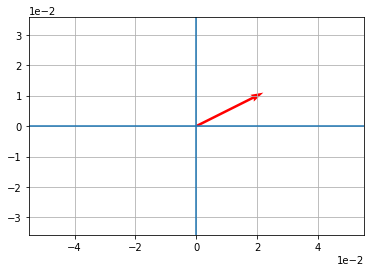

In [2]:
%matplotlib inline
v = np.array([2,1])

origin = [0], [0]
plt.axhline()
plt.axvline()
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, *v, scale=10, color='r')
plt.show()

## 计算向量对应的标量

\begin{equation}\|\vec{v}\| = \sqrt{v_{1}\;^{2} + v_{2}\;^{2}}\end{equation}


\begin{equation}\|\vec{v}\| = \sqrt{2^{2} + 1^{2}}\end{equation}


\begin{equation}\|\vec{v}\| = \sqrt{4 + 1}\end{equation}


\begin{equation}\|\vec{v}\| = \sqrt{5} \approx 2.24\end{equation}


In [3]:
vMag = math.sqrt(v[0]**2 + v[1]**2)
vMag

2.23606797749979

对于n维空间的情况

\begin{equation}\|\vec{v}\| = \sqrt{v_{1}\;^{2} + v_{2}\;^{2} ... + v_{n}\;^{2}}\end{equation}

In [4]:
vMag = np.linalg.norm(v) # 使用 norm 方法
vMag

2.23606797749979

In [5]:
help(np.linalg.norm)

Help on function norm in module numpy.linalg:

norm(x, ord=None, axis=None, keepdims=False)
    Matrix or vector norm.
    
    This function is able to return one of eight different matrix norms,
    or one of an infinite number of vector norms (described below), depending
    on the value of the ``ord`` parameter.
    
    Parameters
    ----------
    x : array_like
        Input array.  If `axis` is None, `x` must be 1-D or 2-D.
    ord : {non-zero int, inf, -inf, 'fro', 'nuc'}, optional
        Order of the norm (see table under ``Notes``). inf means numpy's
        `inf` object.
    axis : {int, 2-tuple of ints, None}, optional
        If `axis` is an integer, it specifies the axis of `x` along which to
        compute the vector norms.  If `axis` is a 2-tuple, it specifies the
        axes that hold 2-D matrices, and the matrix norms of these matrices
        are computed.  If `axis` is None then either a vector norm (when `x`
        is 1-D) or a matrix norm (when `x` is 2-D) i

### 计算向量的方向（角度）
\begin{equation}tan(\theta) = \frac{1}{2}\end{equation}

\begin{equation}\theta = tan^{-1} (0.5) \approx 26.57^{o}\end{equation}

In [6]:
angle = math.degrees(math.atan(v[1] / v[0])) # ard (arctan) → degree
angle

26.56505117707799

In [7]:
print(math.degrees(math.atan(-2 / 1)))       # 角度应该在第二象限

-63.43494882292201


> [atan2](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arctan2.html?highlight=atan2)文档

![atan2](http://bazhou.blob.core.windows.net/learning/mpp/atan2.png)

In [8]:
print(np.degrees(np.arctan2(v[1], v[0])))
s = np.array([-2,1])
print (np.degrees(np.arctan2(s[1], s[0])))

26.56505117707799
153.434948822922


## 向量加

\begin{equation}\vec{v} = \begin{bmatrix}2 \\ 1 \end{bmatrix}\end{equation}

\begin{equation}\vec{s} = \begin{bmatrix}-3 \\ 2 \end{bmatrix}\end{equation}

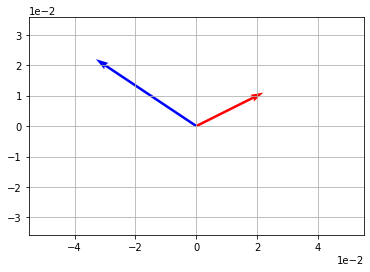

In [9]:
v = np.array([2,1])
s = np.array([-3,2])

vecs = np.array([v,s])
origin = [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['r', 'b'], scale=10)
plt.show()

\begin{equation}\vec{z} = \vec{v}+\vec{s}\end{equation}

\begin{equation}\vec{z} = \begin{bmatrix}2 \\ 1 \end{bmatrix} + \begin{bmatrix}-3 \\ 2 \end{bmatrix}\end{equation}

\begin{equation}\vec{z} = \begin{bmatrix}2 \\ 1 \end{bmatrix} + \begin{bmatrix}-3 \\ 2 \end{bmatrix} = \begin{bmatrix}-1 \\ 3 \end{bmatrix}\end{equation}


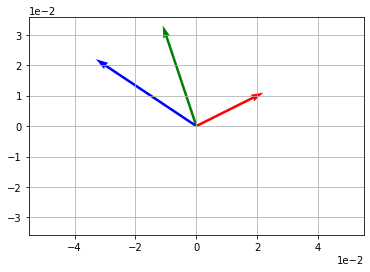

In [10]:
z = v + s
vecs = np.array([v,s,z])
origin = [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['r', 'b', 'g'], scale=10)
plt.show()

# 向量乘

向量乘有三种

- 标量乘
- 点积
- 叉积

## 标量乘


\begin{equation} \vec{w} = 2\vec{v}\end{equation}


\begin{equation}\vec{v} = \begin{bmatrix}2 \\ 1 \end{bmatrix}\end{equation}


\begin{equation}\vec{w} = \begin{bmatrix}2 \cdot 2 \\  2 \cdot 1 \end{bmatrix}\end{equation}


\begin{equation}\vec{w} = \begin{bmatrix}2 \cdot 2 \\  2 \cdot 1 \end{bmatrix} = \begin{bmatrix}4 \\ 2 \end{bmatrix}\end{equation}

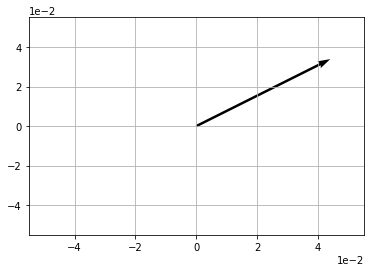

In [11]:
v = np.array([2,1])

w = 2 * v

origin = [0], [0]
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, *w, scale=10)
plt.show()

乘以一个分数就是标量除

\begin{equation}\vec{b} = \frac{\vec{v}}{2}\end{equation}

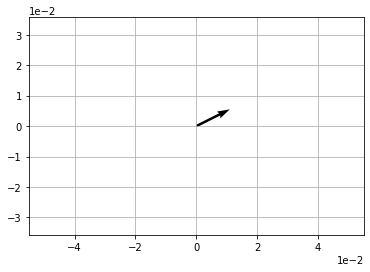

In [12]:
b = v / 2

origin = [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, *b, scale=10)
plt.show()

## 点乘（内积）

- 点乘的结果是一个标量
- 叉乘的结果是一个向量


\begin{equation} \vec{v} \cdot \vec{s} = (v_{1} \cdot s_{1}) + (v_{2} \cdot s_{2}) ... + \; (v_{n} \cdot s_{n})\end{equation}


\begin{equation} \vec{v} \cdot \vec{s} = (2 \cdot -3) + (1 \cdot 2) = -6 + 2 = -4\end{equation}

In [13]:
v = np.array([2,1])
s = np.array([-3,2])
d = np.dot(v,s)             # 方法名是 dot
print(d)
print(v @ s)                # 或者直接用 @ 操作符

-4
-4


### 用点乘计算向量的余弦


$$ \vec{v} \cdot \vec{s} = \|\vec{v} \|\|\vec{s}\| \cos (\theta) $$ 


$$ \cos(\theta) = \frac{\vec{v} \cdot \vec{s}}{\|\vec{v} \|\|\vec{s}\|} $$


$$ \cos(\theta) = \frac{(2 \cdot-3) + (-3 \cdot 2)}{\sqrt{2^{2} + 1^{2}} \times \sqrt{-3^{2} + 2^{2}}} $$


$$\cos(\theta) = \frac{-4}{8.0622577483}$$


$$\cos(\theta) = -0.496138938357 $$

$$\theta \approx 119.74 $$

In [14]:
v = np.array([2,1])
s = np.array([-3,2])

vMag = np.linalg.norm(v)               # 计算标量
sMag = np.linalg.norm(s)

cos = (v @ s) / (vMag * sMag)          # 点乘除标量积是余弦

theta = math.degrees(math.acos(cos))

theta

119.74488129694222

## 叉乘（外积）


\begin{equation}\vec{p} = \begin{bmatrix}2 \\ 3 \\ 1 \end{bmatrix}\;\; \vec{q} = \begin{bmatrix}1 \\ 2 \\ -2 \end{bmatrix}\end{equation}


\begin{equation}r_{1} = p_{2}q_{3} - p_{3}q_{2}\end{equation}
\begin{equation}r_{2} = p_{3}q_{1} - p_{1}q_{3}\end{equation}
\begin{equation}r_{3} = p_{1}q_{2} - p_{2}q_{1}\end{equation}


\begin{equation}\vec{r} = \vec{p} \times \vec{q} = \begin{bmatrix}(3 \cdot -2) - (1 \cdot 2) \\ (1 \cdot 1) - (2 \cdot -2) \\ (2 \cdot 2) - (3 \cdot 1) \end{bmatrix} = \begin{bmatrix}-6 - 2 \\ 1 - -4 \\ 4 - 3 \end{bmatrix} = \begin{bmatrix}-8 \\ 5 \\ 1 \end{bmatrix}\end{equation}

In [15]:
p = np.array([2,3,1])
q = np.array([1,2,-2])
r = np.cross(p,q)
r

array([-8,  5,  1])

### 理解向量外积

- 只知道定义和方法cross是不够的
- 应用场景：求共点向量的法向量
- 需要三维可视化

> 编程实现！

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def vec3d_range(m):
    a = [(min(0,m[:,i].min()), m[:,i].max()) for i in [0, 1, 2]]
    return np.array(a) * 1.2

def vec3d_label(v):
    return '(' + ','.join(str(i) for i in v) + ')'
    
def vec3d_cord(m):
    return zip(*np.concatenate((np.zeros(m.shape), m), axis=1))

def vec3d_color(m):
    l = np.random.rand(*m.shape)
    return [*l, *[i for s in [*zip(l,l)] for i in s]]

In [17]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

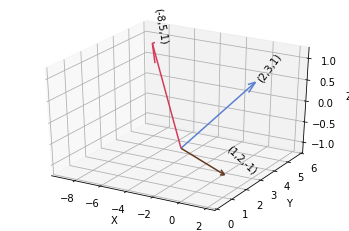

In [18]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt3d

p, q, r = [[2, 3, 1], [1, 2, -1], [-8, 5, 1]]
m = np.array([p,q,r])
ax = plt3d.axes(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
rx, ry, rz = vec3d_range(m)
ax.set_xlim(rx)
ax.set_ylim(ry)
ax.set_zlim(rz)
ax.quiver(*vec3d_cord(m), arrow_length_ratio=0.1, color=vec3d_color(m))
[ax.text(*v, vec3d_label(v), tuple(v)) for v in [p, q, r]]
plt.show()

- 3D绘制的帮助函数

```python
def vec3d_range(m):
    a = [(min(0,m[:,i].min()), m[:,i].max()) for i in [0, 1, 2]]
    return np.array(a) * 1.2
def vec3d_label(v):
    return '(' + ','.join(str(i) for i in v) + ')'
def vec3d_cord(m):
    return zip(*np.concatenate((np.zeros(m.shape), m), axis=1))
def vec3d_color(m):
    l = np.random.rand(*m.shape)
    return [*l, *[i for s in [*zip(l,l)] for i in s]]
```

- 很多时候文档可以帮助了解接口（目的）
- 需要运行代码来深入理解实现（测试即文档）
- 经过训练，人脑也可以运行代码（仔细阅读）

# 矩阵


- 矩阵的记法

\begin{equation}A = \begin{bmatrix}
  1 & 2 & 3 \\
  4 & 5 & 6
 \end{bmatrix}
\end{equation}

- 矩阵的下标

\begin{equation}A = \begin{bmatrix}
  a_{1,1} & a_{1,2} & a_{1,3} \\
  a_{2,1} & a_{2,2} & a_{2,3}
 \end{bmatrix}
\end{equation}

In [19]:
A = np.array([[1,2,3],
              [4,5,6]])
print(A)
M = np.matrix([[1,2,3],        # 也可以用matrix，它是array的子类
               [4,5,6]])
print(M)

[[1 2 3]
 [4 5 6]]
[[1 2 3]
 [4 5 6]]


### 向量加

\begin{equation}\begin{bmatrix}1 & 2 & 3 \\4 & 5 & 6\end{bmatrix}+ \begin{bmatrix}6 & 5 & 4 \\3 & 2 & 1\end{bmatrix} = \begin{bmatrix}7 & 7 & 7 \\7 & 7 & 7\end{bmatrix}\end{equation}

In [20]:
A = np.array([[1,2,3],
              [4,5,6]])
B = np.array([[6,5,4],
              [3,2,1]])
print(A + B)                            # + 操作符
print(np.add(A, B))                     # add方法

[[7 7 7]
 [7 7 7]]
[[7 7 7]
 [7 7 7]]


### 向量减

\begin{equation}\begin{bmatrix}1 & 2 & 3 \\4 & 5 & 6\end{bmatrix}- \begin{bmatrix}6 & 5 & 4 \\3 & 2 & 1\end{bmatrix} = \begin{bmatrix}-5 & -3 & -1 \\1 & 3 & 5\end{bmatrix}\end{equation}

In [21]:
A = np.array([[1,2,3],
              [4,5,6]])
B = np.array([[6,5,4],
              [3,2,1]])
print (A - B)                           # - 操作符
print(np.subtract(A, B))                # subtract方法

[[-5 -3 -1]
 [ 1  3  5]]
[[-5 -3 -1]
 [ 1  3  5]]


### 求负

\begin{equation}C = \begin{bmatrix}-5 & -3 & -1 \\1 & 3 & 5\end{bmatrix}\end{equation}

\begin{equation}-C = \begin{bmatrix}5 & 3 & 1 \\-1 & -3 & -5\end{bmatrix}\end{equation}

In [22]:
C = np.array([[-5,-3,-1],
              [1,3,5]])
print(-C)                               # - 这里是一元的操作符，和减法（二元的操作符）是不同的
print(np.negative(C))                   # negative方法

[[ 5  3  1]
 [-1 -3 -5]]
[[ 5  3  1]
 [-1 -3 -5]]


### 矩阵转置
\begin{equation}\begin{bmatrix}1 & 2 & 3 \\4 & 5 & 6\end{bmatrix}^{T} = \begin{bmatrix}1 & 4\\2 & 5\\3 & 6 \end{bmatrix}\end{equation}

In [23]:
A = np.array([[1,2,3],
              [4,5,6]])
print(A.T)                             # T 简写
print(np.transpose(A))                 # transpose方法

[[1 4]
 [2 5]
 [3 6]]
[[1 4]
 [2 5]
 [3 6]]


### 矩阵乘

简单情况：矩阵乘以标量

\begin{equation}2 \times \begin{bmatrix}1 & 2 & 3 \\4 & 5 & 6\end{bmatrix} = \begin{bmatrix}2 & 4 & 6 \\8 & 10 & 12\end{bmatrix}\end{equation}

In [24]:
A = np.array([[1,2,3],
              [4,5,6]])
2 * A

array([[ 2,  4,  6],
       [ 8, 10, 12]])

### 矩阵相乘

\begin{equation}\begin{bmatrix}1 & 2 & 3 \\4 & 5 & 6\end{bmatrix} \cdot \begin{bmatrix}9 & 8 \\ 7 & 6 \\ 5 & 4\end{bmatrix}\end{equation}


\begin{equation}(1,2,3) \cdot (9,7,5) = (1 \times 9) + (2 \times 7) + (3 \times 5) = 38\end{equation}


\begin{equation}\begin{bmatrix}38 & ?\\? & ?\end{bmatrix} \end{equation}


\begin{equation}(1,2,3) \cdot (8,6,4) = (1 \times 8) + (2 \times 6) + (3 \times 4) = 32\end{equation}


\begin{equation}\begin{bmatrix}38 & 32\\? & ?\end{bmatrix} \end{equation}



\begin{equation}(4,5,6) \cdot (9,7,5) = (4 \times 9) + (5 \times 7) + (6 \times 5) = 101\end{equation}



\begin{equation}\begin{bmatrix}38 & 32\\101 & ?\end{bmatrix} \end{equation}



\begin{equation}(4,5,6) \cdot (8,6,4) = (4 \times 8) + (5 \times 6) + (6 \times 4) = 86\end{equation}


\begin{equation}\begin{bmatrix}38 & 32\\101 & 86\end{bmatrix} \end{equation}

In [25]:
A = np.array([[1,2,3],
              [4,5,6]])
B = np.array([[9,8],
              [7,6],
              [5,4]])
print(A.shape, B.shape)
print(np.dot(A,B))
print(A @ B)                    # @ 代表点乘（内积）

(2, 3) (3, 2)
[[ 38  32]
 [101  86]]
[[ 38  32]
 [101  86]]


In [26]:
A = np.matrix([[1,2,3]
               ,[4,5,6]])
B = np.matrix([[9,8],
               [7,6],
               [5,4]])
print(A * B)                                    # * 操作符也是可以的，但是注意：不要用在向量上
line = np.array(A)[0]
column = np.array(B)[:,0]
print(line, line.shape, column, column.shape)   # 取出第一行和第一列
print(line * column, line @ column)             # 对于向量，* 和 @ 完全不同

[[ 38  32]
 [101  86]]
[1 2 3] (3,) [9 7 5] (3,)
[ 9 14 15] 38


矩阵相乘没有交换律
\begin{equation}2 \times 4 = 4 \times 2\end{equation}

\begin{equation}\begin{bmatrix}2 & 4 \\6 & 8\end{bmatrix} \cdot \begin{bmatrix}1 & 3 \\ 5 & 7\end{bmatrix} \ne \begin{bmatrix}1 & 3 \\ 5 & 7\end{bmatrix} \cdot \begin{bmatrix}2 & 4 \\6 & 8\end{bmatrix}\end{equation}

可以想像一个3x2的矩阵乘以一个2x3的矩阵

In [27]:
A = np.array([[2,4],
              [6,8]])
B = np.array([[1,3],
              [5,7]])
print(A @ B)
print(B @ A)

[[22 34]
 [46 74]]
[[20 28]
 [52 76]]


## 单位矩阵

\begin{equation}\begin{bmatrix}1 & 0 & 0\\0 & 1 & 0\\0 & 0 & 1\end{bmatrix} \end{equation}


乘以单位矩阵还是矩阵本身


\begin{equation}\begin{bmatrix}1 & 2 & 3 \\4 & 5 & 6\\7 & 8 & 9\end{bmatrix} \cdot \begin{bmatrix}1 & 0 & 0\\0 & 1 & 0\\0 & 0 & 1\end{bmatrix} = \begin{bmatrix}1 & 2 & 3 \\4 & 5 & 6\\7 & 8 & 9\end{bmatrix} \end{equation}

In [28]:
A = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
B = np.array([[1,0,0],
              [0,1,0],
              [0,0,1]])
print(A @ B)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


## 逆矩阵

\begin{equation}A \div B = A \cdot B^{-1}\end{equation}


\begin{equation}B \cdot B^{-1} = B^{-1} \cdot B = I\end{equation}

**I** 是单位矩阵

In [29]:
B = np.array([[6,2],
              [1,2]])

print(np.linalg.inv(B))    # 矩阵求逆
print(np.matrix(B).I)      # 简写，参考转置

[[ 0.2 -0.2]
 [-0.1  0.6]]
[[ 0.2 -0.2]
 [-0.1  0.6]]


## 解方程组

\begin{equation}2x + 4y = 18\end{equation}
\begin{equation}6x + 2y = 34\end{equation}

\begin{equation}\begin{bmatrix}2 & 4\\6 & 2\end{bmatrix} \cdot \begin{bmatrix}x\\y\end{bmatrix}=\begin{bmatrix}18\\34\end{bmatrix}\end{equation}


\begin{equation}A=\begin{bmatrix}2 & 4\\6 & 2\end{bmatrix}\;\;\;\;X=\begin{bmatrix}x\\y\end{bmatrix}\;\;\;\;B=\begin{bmatrix}18\\34\end{bmatrix}\end{equation}


\begin{equation}\begin{bmatrix}2 & 4\\6 & 2\end{bmatrix}^{-1} = \begin{bmatrix}-0.1 & 0.2\\0.3 & -0.1\end{bmatrix}\end{equation}


\begin{equation}X = \begin{bmatrix}-0.1 & 0.2\\0.3 & -0.1\end{bmatrix} \cdot \begin{bmatrix}18\\34\end{bmatrix}\end{equation}


\begin{equation}X = \begin{bmatrix}5\\2\end{bmatrix}\end{equation}

In [30]:
A = np.array([[2,4],
              [6,2]])

B = np.array([[18],
              [34]])

C = np.linalg.inv(A) @ B

print(C)
print(np.linalg.solve(A, B))             # 调用方法solve，在Numpy介绍中提到过

[[5.]
 [2.]]
[[5.]
 [2.]]


# 变换，特征向量和特征值



## 线性变换


对矩阵 ***A*** 和向量 ***v***:

$$ A = \begin{bmatrix}2 & 3\\5 & 2\end{bmatrix} \;\;\;\; \vec{v} = \begin{bmatrix}1\\2\end{bmatrix}$$

定义 ***T*** 为:

$$ T(\vec{v}) = A\vec{v} $$

向量和矩阵的点乘是和右侧矩阵的每一列做向量点乘，最后得到一个变换后的向量

$$\begin{bmatrix}2 & 3\\5 & 2\end{bmatrix} \cdot  \begin{bmatrix}1\\2\end{bmatrix} = \begin{bmatrix}8\\9\end{bmatrix}$$

In [31]:
v = np.array([1,2])
A = np.array([[2,3],
              [5,2]])

t = A@v
print (t)

[8 9]


可见变换T是一个从二维实数向量向另一个二维实数向量的变换: ${\rm I\!R^{2} \to \rm I\!R^{2} }$


输出向量的维度可以和原向量不同，因此准确地说：${\rm I\!R^{n} \to \rm I\!R^{m}}$

比如

$$ A = \begin{bmatrix}2 & 3\\5 & 2\\1 & 1\end{bmatrix} \;\;\;\; \vec{v} = \begin{bmatrix}1\\2\end{bmatrix}$$

$$ T(\vec{v}) = A\vec{v} $$

$$\begin{bmatrix}2 & 3\\5 & 2\\1 & 1\end{bmatrix} \cdot  \begin{bmatrix}1\\2\end{bmatrix} = \begin{bmatrix}8\\9\\3\end{bmatrix}$$

所以${ T: \rm I\!R^{2} \to \rm I\!R^{3} }$

In [32]:
v = np.array([1,2])
A = np.array([[2,3],
              [5,2],
              [1,1]])

t = A@v                   # (2) → (3)
print (t)

[8 9 3]


In [33]:
v = np.array([1,2])
A = np.array([[1,2],
              [2,1]])

t = A@v                   # (2) → (2)
print (t)

[5 4]


## 向量的缩放和旋转变换


$$ A = \begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \;\;\;\; \vec{v} = \begin{bmatrix}1\\0\end{bmatrix}$$

缩放变换的例子：

\begin{equation}\begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \cdot  \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}2\\0\end{bmatrix}\end{equation}

旋转90°的变换
\begin{equation}\begin{bmatrix}0 & -1\\1 & 0\end{bmatrix} \cdot  \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}0\\1\end{bmatrix}\end{equation}

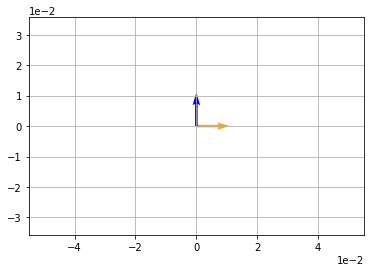

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

v = np.array([1,0])
A = np.array([[0,-1],
              [1,0]])

t = A@v

vecs = np.array([v,t])
origin = [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['orange', 'blue'], scale=10)
plt.show()

变换
\begin{equation}\begin{bmatrix}2 & 1\\1 & 2\end{bmatrix} \cdot  \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}2\\1\end{bmatrix}\end{equation}

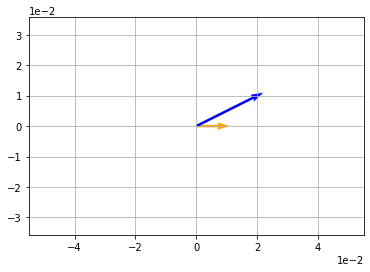

In [35]:
v = np.array([1,0])
A = np.array([[2,1],                       # 旋转 + 缩放
              [1,2]])

t = A@v

vecs = np.array([v,t])
origin = [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['orange', 'blue'], scale=10)
plt.show()

### 线性变换的几何解释

- 缩放: ${a \cdot I \cdot \vec{v}}$
- 旋转: ${\vec{v} \cdot T}$
- 平移: ${\vec{v} + \vec{b}}$

在二维平面上可以定义旋转矩阵${T}$为：
$$T = \begin{bmatrix}\cos{\theta} & -\sin{\theta}\\ \sin{\theta} & \cos{\theta} \end{bmatrix}$$

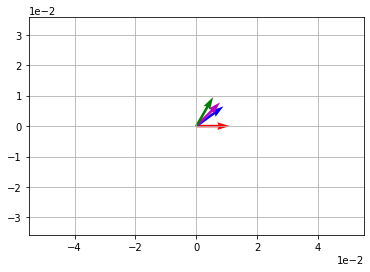

In [36]:
cos, sin, pi = math.cos, math.sin, math.pi

def rotate(a):
    return np.array([[cos(a), -sin(a)],
                   [sin(a),cos(a)]])

v = np.array([1,0])
alpha = pi/5                      # 旋转36°
beta  = pi/4                      # 旋转45°
gamma = pi/3                      # 旋转60°

vecs = np.array([v, *[rotate(a)@v for a in [alpha, beta, gamma]]])
origin = [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['r', 'b', 'm', 'g'], scale=10)
plt.show()

### 仿射变换

$$T(\vec{v}) = A\vec{v} + \vec{b}$$

例如：

\begin{equation}\begin{bmatrix}5 & 2\\3 & 1\end{bmatrix} \cdot  \begin{bmatrix}1\\1\end{bmatrix} + \begin{bmatrix}-2\\-6\end{bmatrix} = \begin{bmatrix}5\\-2\end{bmatrix}\end{equation}

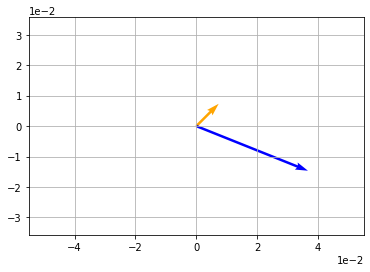

In [37]:
v = np.array([1,1])
A = np.array([[5,2],
              [3,1]])
b = np.array([-2,-6])

t = A@v + b

vecs = np.array([v,t])
origin = [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['orange', 'blue'], scale=15)
plt.show()

## 特征向量和特征值 

变换 ${\begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \cdot  \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}2\\0\end{bmatrix}}$ 等价于 ${2 \times \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}2\\0\end{bmatrix}}$，也可记作${ T(\vec{v}) = \lambda\vec{v}}$，其中

$$ T(\vec{v}) = A\vec{v} = \lambda\vec{v}$$

则称 ${\vec{v}}$ 和 ${\lambda}$ 是 ${A}$ 的特征向量和特征值。

假设，${A=\begin{bmatrix}2 & 0\\0 & 3\end{bmatrix}}$, 下面求 ${A}$ 的特征向量和特征值：

>[特征值](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html?highlight=eig#numpy.linalg.eig)文档

![特征值](http://bazhou.blob.core.windows.net/learning/mpp/eig.png)

In [38]:
A = np.array([[2,0],
              [0,3]])
eVals, eVecs = np.linalg.eig(A)
print(eVals)
print(eVecs)

[2. 3.]
[[1. 0.]
 [0. 1.]]


特征值和特征向量是成对出现的：
$$ \bigg( \lambda_{1} = 2, \;\; \vec{v_{1}} = \begin{bmatrix}1 \\ 0\end{bmatrix} \bigg) \;\;\; 和\;\;\; \bigg( \lambda_{2} = 3, \;\; \vec{v_{2}} = \begin{bmatrix}0 \\ 1\end{bmatrix} \bigg) $$

可以验证，特征值乘相应的特征向量等于矩阵点乘特征向量 

$$ 2 \times \begin{bmatrix}1 \\ 0\end{bmatrix} = \begin{bmatrix}2 \\ 0\end{bmatrix}  \Leftrightarrow \begin{bmatrix}2 & 0\\0 & 3\end{bmatrix} \cdot \begin{bmatrix}1 \\ 0\end{bmatrix} = \begin{bmatrix}2 \\ 0\end{bmatrix} $$ 

以及

$$ 3 \times \begin{bmatrix}0 \\ 1\end{bmatrix} = \begin{bmatrix}0 \\ 3\end{bmatrix}  \Leftrightarrow \begin{bmatrix}2 & 0\\0 & 3\end{bmatrix} \cdot \begin{bmatrix}0 \\ 1\end{bmatrix} = \begin{bmatrix}0 \\ 3\end{bmatrix} $$

练习：

求矩阵 ${\begin{bmatrix}2 & 1\\1 & 2\end{bmatrix}}$ 的特征值和特征向量

In [39]:
A = np.array([[2,1],
              [1,2]])

eVals, eVecs = np.linalg.eig(A)
print(eVals, eVecs)                                        # 注意取eVecs的列
[A @ eVecs[:,i] == eVals[i] * eVecs[:,i] for i in [0, 1]]  # 向量的 == 操作


[3. 1.] [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


[array([ True,  True]), array([ True,  True])]

$$ \bigg( \lambda_{1} = 3, \;\; \vec{v_{1}} = \begin{bmatrix}0.70710678 \\ 0.70710678\end{bmatrix} \bigg) \;\;\;和\;\;\; \bigg( \lambda_{2} = 1, \;\; \vec{v_{2}} = \begin{bmatrix}-0.70710678 \\ 0.70710678\end{bmatrix} \bigg) $$

$$ 3 \times \begin{bmatrix}0.70710678 \\ 0.70710678\end{bmatrix} = \begin{bmatrix}2.12132034 \\ 2.12132034\end{bmatrix}  \Leftrightarrow \begin{bmatrix}2 & 1\\1 & 2\end{bmatrix} \cdot \begin{bmatrix}0.70710678 \\ 0.70710678\end{bmatrix} = \begin{bmatrix}2.12132034 \\ 2.12132034\end{bmatrix} $$

和

$$ 1 \times \begin{bmatrix}-0.70710678 \\ 0.70710678\end{bmatrix} = \begin{bmatrix}-0.70710678\\0.70710678\end{bmatrix}  \Leftrightarrow \begin{bmatrix}2 & 1\\1 & 2\end{bmatrix} \cdot \begin{bmatrix}-0.70710678 \\ 0.70710678\end{bmatrix} = \begin{bmatrix}-0.70710678\\0.70710678\end{bmatrix} $$

## 特征分解

从前面的例子可以推导出下面的等式：

$$A = Q \Lambda Q^{-1}$$

（可以理解为变换到特征向量定义的空间上，投影值就是特征值，然后再变换回来）

In [40]:
A = np.array([[3,2],
              [1,0]])

l, Q = np.linalg.eig(A)
L = np.diag(l)
Qinv = np.linalg.inv(Q)
print(Q)
print(L)
print(Q)

[[ 0.96276969 -0.48963374]
 [ 0.27032301  0.87192821]]
[[ 3.56155281  0.        ]
 [ 0.         -0.56155281]]
[[ 0.96276969 -0.48963374]
 [ 0.27032301  0.87192821]]


计算${Q}$、${\Lambda}$ 和 ${Q^{-1}}$
$$Q=\begin{bmatrix}0.96276969 & -0.48963374\\0.27032301 & 0.87192821\end{bmatrix}$$

$$\Lambda=\begin{bmatrix}3.56155281 & 0\\0 & -0.56155281\end{bmatrix}$$

$$Q^{-1}=\begin{bmatrix}0.89720673 & 0.50382896\\-0.27816009 & 0.99068183\end{bmatrix}$$

验证

${A = Q \lambda Q^{-1}}$

In [41]:
v = np.array([1.,3.])
np.around(A@v) == np.around(Q@L@Qinv@v)

array([ True,  True])

- 下面可视化变换过程

|${Q}$|${\Lambda}$|${Q^{-1}}$|
|-|-|-|
|${{\color{orange}橙} \to {\color{red}红}}$|${{\color{red}红} \to {\color{magenta}紫}}$|${{\color{magenta}紫} \to {\color{blue}蓝}}$|

(2,) (2,) (2, 2)


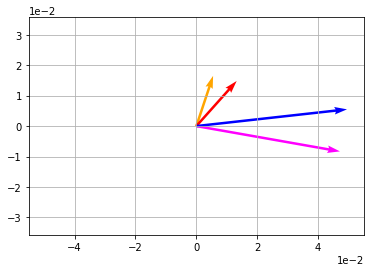

In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

t1 = np.linalg.inv(Q)@v
print(v.shape, t1.shape, L.shape)
t2 = L@t1
t3 = Q@t2

vecs = np.array([v, t1, t2, t3])
origin = [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['orange', 'red', 'magenta', 'blue'], scale=20)
plt.show()

## 矩阵的秩

对于一个方形矩阵，不为0的特征值的个数。

比如
${A=\begin{bmatrix}1 & 2\\4 & 3\end{bmatrix}}$ 其特征值对角阵是 ${\Lambda=\begin{bmatrix}-1 & 0\\0 & 5\end{bmatrix}}$

所以${A}$的秩是2，和矩阵的维度一样，称为满秩矩阵。

In [43]:
A = np.matrix([[1,2],
              [4,3]])
l, Q = np.linalg.eig(A)
L = np.diag(l)
L

array([[-1.,  0.],
       [ 0.,  5.]])

又例如${B=\begin{bmatrix}3 & -3 & 6\\2 & -2 & 4\\1 & -1 & 2\end{bmatrix}}$ 的特征值对角阵是 ${\Lambda=\begin{bmatrix}3 & 0& 0\\0 & -6\times10^{-17} & 0\\0 & 0 & 3.6\times10^{-16}\end{bmatrix} \approx \begin{bmatrix}3 & 0& 0\\0 & 0 & 0\\0 & 0 & 0\end{bmatrix}}$

所以${B}$的秩是1，比矩阵的维度3小，称为欠定矩阵。

In [44]:
B = np.array([[3,-3,6],
              [2,-2,4],
              [1,-1,2]])
lb, Qb = np.linalg.eig(B)
Lb = np.diag(lb)
Lb

array([[3.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.23364153e-16, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

## 满秩方阵的可逆性

证明：${A^{-1} = Q \Lambda^{-1} Q^{-1}}$

$$ I = A^{-1}A $$
因为：${A=Q \Lambda Q^{-1}}$
$$ I = A^{-1}Q \Lambda Q^{-1} $$
两边同时乘：${Q\Lambda^{-1}Q^{-1}}$
$$ IQ\Lambda^{-1}Q^{-1} = A^{-1}Q \Lambda Q^{-1}Q\Lambda^{-1}Q^{-1}$$
两边同时消去单位阵
$$ Q\Lambda^{-1}Q^{-1} = A^{-1} $$

- 对角阵求逆只要把对角元素求倒数即可（矩阵除法→算术除法）
- 0没有倒数（满秩要求）
- 对于满秩方阵的求逆
  - 特征值和特征向量
  - 算术除
  - 矩阵乘

练习:

验证 ${A = \begin{bmatrix}1 & 2\\4 & 3\end{bmatrix} \Rightarrow A^{-1}=\begin{bmatrix}-0.6 & 0.4\\0.8 & -0.2\end{bmatrix}}$

In [45]:
A = np.matrix([[1,2],
              [4,3]])
l, Q = np.linalg.eig(A)
L = np.matrix(np.diag(l))
np.around(Q@L.I@Q.I,1) == np.around(A.I,1)

array([[ True,  True],
       [ True,  True]])